<a href="https://colab.research.google.com/github/MV2290/Penetration-Risk-Analysis/blob/main/Penetration_analysis_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Import Data and setup

In [2]:
# File directory
file_directory = r''
# Import data
raw_data = pd.read_csv(file_directory)
raw_data

,Item\r\r\nName,Item\r\r\nSource File,ATI MEP HANDOVER\r\r\nSubZone,IDENTITY DATA\r\r\nBBH_WBS_LVL5_Level,IDENTITY DATA\r\r\nMC Provision Host,Other\r\r\nHost Id,GEOMETRY\r\r\nBBH_Encumber-Radius mm,GEOMETRY\r\r\nBBH_ShaftLenght mm,GEOMETRY\r\r\nBBH_ShaftWidth mm,ATI MEP HANDOVER\r\r\nCategory system
0,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.1,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,2380.0,915.0,M39
1,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.1,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,1800.0,150.0,K07
2,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.0,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,300.0,160.0,M44
3,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.0,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,1220.0,1800.0,M57
4,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.2,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,220.0,380.0,M44
...,...,...,...,...,...,...,...,...,...,...
3944,BBH_Rectangular_Opening_Void_Request_B70_2,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ4.1,E00,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,4649.0,2000.0,M57
3945,BBH_Rectangular_Opening_Void_Request_B70_2,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ4.1,E00,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,4688.0,2000.0,M57
3946,BBH_Rectangular_Opening_Void_Request_B70_2,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ1.3,NaN,NaN,NaN,NaN,1900.0,6650.0,K07
3947,BBH_Rectangular_Opening_Void_Request_B70_2,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ5.2,NaN,NaN,NaN,NaN,2200.0,6275.0,M57


In [3]:
# Rename column if need
column_list = raw_data.columns.to_list()
print(column_list)
# Rename column
column_list = raw_data.columns.to_list()
raw_data = raw_data.rename(columns={
    column_list[0]:'Item',
    column_list[1]:'Source',
    column_list[2]:'Zone',
    column_list[3]:'Level',
    column_list[4]:'Host',
    column_list[6]:'Diameter',
    column_list[7]:'ShaftLength',
    column_list[8]:'ShaftWidth',
    column_list[9]:'Category',
    })
raw_data.columns

['Item\r\r\nName', 'Item\r\r\nSource File', 'ATI MEP HANDOVER\r\r\nSubZone', 'IDENTITY DATA\r\r\nBBH_WBS_LVL5_Level', 'IDENTITY DATA\r\r\nMC Provision Host', 'Other\r\r\nHost Id', 'GEOMETRY\r\r\nBBH_Encumber-Radius mm', 'GEOMETRY\r\r\nBBH_ShaftLenght mm', 'GEOMETRY\r\r\nBBH_ShaftWidth mm', 'ATI MEP HANDOVER\r\r\nCategory system']


Index(['Item', 'Source', 'Zone', 'Level', 'Host', 'Other\r\r\nHost Id',
       'Diameter', 'ShaftLength', 'ShaftWidth', 'Category'],
      dtype='object')

In [4]:
# Drop rows with null value of specific column if need (level example)
raw_data.dropna(subset=['Level'], inplace=True)

# Define values to apply

In [5]:
# SETUP Milestone COLUMN

# G1 Milestone
# Building 70
zone_M1 = ['CZ2.2','CZ3.2']
level_M1 = ['EF1','EK1','E00','E01']
# Building 74
zone_M2 = ['CZ5.0','CZ5.1','CZ5.2','CZ5.3',]
level_M2 = ['EF1','EK1','E00','E01']
# Building 76
zone_M3 = ['CZ3.0','CZ3.1','CZ3.2','CZ3.3']
level_M3 = ['EF1','EK1','E00','E01','E02','E03']

zone_M4 = ['CZ10.2']
level_M4 = ['EF1','EK1']

# G2 Milestone
# Building 74
zone_M6 = ['CZ5.0','CZ5.1','CZ5.2','CZ5.3',]
level_M6 = ['E02']
# Building 76
zone_M7 = ['CZ3.0','CZ3.1','CZ3.2','CZ3.3']
level_M7 = ['E04']
# Building 75
zone_M8 = ['CZ2.1']
level_M8 = ['EF1','EK1','E00','E01']

# G3 Milestone
# Building 76
zone_M10 = ['CZ3.0','CZ3.1','CZ3.2','CZ3.3']
level_M10 = ['E03','E04','E05','ETA','ETT']
# Building 74
zone_M11 = ['CZ5.0','CZ5.1','CZ5.2','CZ5.3',]
level_M11 = ['E03']
# Building 75
zone_M12 = ['CZ2.1','CZ2.2']
level_M12 = ['E02']

In [17]:
MEP_categories = ['M39','M40','M44','M57','M51','K07']
Size_ranges = {'R1':200,'R2':350,'R3':1000}
Size_range_HC = {'R1':175,'R3':175}
MEP_low_risk = ['M40','M44','K07']
MEP_medium_risk = ['M39','M51','M57']

# Clean and categorization

In [8]:
def set_milestone(data, zone_list, level_list, milestone_value):
    condition = (data['Zone'].isin(zone_list)) & (data['Level'].isin(level_list))
    data_copy = data.copy()
    data_copy.loc[condition, 'Milestone'] = milestone_value
    return data_copy

In [9]:
# CREATE A COPY DATAFRAME
data = raw_data.copy()

# Create the 'Milestone' column with a default value (e.g., empty string)
data['Milestone'] = 'TBD'

# Milestone G1
data.loc[:, 'Milestone'] = set_milestone(data, zone_M1, level_M1, 'G1')
data.loc[:, 'Milestone'] = set_milestone(data, zone_M2, level_M2, 'G1')
data.loc[:, 'Milestone'] = set_milestone(data, zone_M3, level_M3, 'G1')
data.loc[:, 'Milestone'] = set_milestone(data, zone_M4, level_M4, 'G1')

# Milestone G2
data.loc[:, 'Milestone'] = set_milestone(data, zone_M6, level_M1, 'G2')
data.loc[:, 'Milestone'] = set_milestone(data, zone_M7, level_M2, 'G2')
data.loc[:, 'Milestone'] = set_milestone(data, zone_M8, level_M3, 'G2')

# Milestone G3
data.loc[:, 'Milestone'] = set_milestone(data, zone_M10, level_M10, 'G3')
data.loc[:, 'Milestone'] = set_milestone(data, zone_M11, level_M11, 'G3')
data.loc[:, 'Milestone'] = set_milestone(data, zone_M12, level_M12, 'G3')

data

,Item,Source,Zone,Level,Host,Other\r\r\nHost Id,Diameter,ShaftLength,ShaftWidth,Category,Milestone
0,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.1,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,2380.0,915.0,M39,G3
1,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.1,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,1800.0,150.0,K07,G3
2,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.0,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,300.0,160.0,M44,G3
3,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.0,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,1220.0,1800.0,M57,G3
4,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.2,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,220.0,380.0,M44,G3
...,...,...,...,...,...,...,...,...,...,...,...
3941,BBH_Circular_Opening_Void_Horizontal_Request_B70,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ4.1,E00,NaN,NaN,165.0,NaN,NaN,M44,TBD
3942,BBH_Circular_Opening_Void_Horizontal_Request_B70,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ4.1,E00,NaN,NaN,208.0,NaN,NaN,M44,TBD
3944,BBH_Rectangular_Opening_Void_Request_B70_2,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ4.1,E00,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,4649.0,2000.0,M57,TBD
3945,BBH_Rectangular_Opening_Void_Request_B70_2,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ4.1,E00,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,NaN,4688.0,2000.0,M57,TBD


In [ ]:
# To use only if clean is necessary
clean = ['insulations','branch','bend','elbow','flanged']

def manual_clean(name):
    name_lower = name.lower()
    for i in clean:
        if i in name_lower.split(' '):
            return None
        elif i in name_lower.split('_'):
            return None
        elif i in name_lower.split('-'):
            return None
    return 'ok'

data['condition'] = raw_data[raw_data.columns[0]].apply(manual_clean)
data.dropna(subset=['condition'], inplace=True)
data

,Item,GEOMETRY\r\r\nPipe Size,GEOMETRY\r\r\nSize,GEOMETRY\r\r\nDuct Size,Item\r\r\nSource File,MECHANICAL\r\r\nSystem Name,ATI MEP HANDOVER\r\r\nMilestone,Size_raw,condition
0,Pipe Types,NaN,160 mmø,NaN,I70_BBH_B70_K07_M00_F2_N002.rvt,BBH 10kV 45,G1,160 mmø,ok
1,Pipe Types,NaN,160 mmø,NaN,I70_BBH_B70_K07_M00_F2_N002.rvt,BBH 10kV 46,G1,160 mmø,ok
2,Pipe Types,NaN,160 mmø,NaN,I70_BBH_B70_K07_M00_F2_N002.rvt,BBH 10kV 47,G1,160 mmø,ok
3,Pipe Types,NaN,160 mmø,NaN,I70_BBH_B70_K07_M00_F2_N002.rvt,BBH 10kV 48,G1,160 mmø,ok
4,Pipe Types,NaN,160 mmø,NaN,I70_BBH_B70_K07_M00_F2_N002.rvt,BBH 10kV 6,G1,160 mmø,ok
...,...,...,...,...,...,...,...,...,...
2299,Übergang rechteck rechteck US,NaN,700 mmx500 mm-700 mmx400 mm,NaN,I70_BBH_B70_K08_M57_F2_N002.rvt,ETA 59,G1,700 mmx500 mm-700 mmx400 mm,ok
2300,Übergang rechteck rechteck US,NaN,700 mmx500 mm-700 mmx400 mm,NaN,I70_BBH_B70_K08_M57_F2_N002.rvt,SUPG 499,G1,700 mmx500 mm-700 mmx400 mm,ok
2301,FDR-3G-_-B,NaN,ø125 mm-ø125 mm,NaN,I70_BBH_B70_K08_M57_F2_N002.rvt,ETA 15,G1,ø125 mm-ø125 mm,ok
2302,FDR-3G-_-B,NaN,ø125 mm-ø125 mm,NaN,I70_BBH_B70_K08_M57_F2_N002.rvt,SUPG 8,G1,ø125 mm-ø125 mm,ok


In [10]:
# GET STRUCTURAL TYPE OF PENETRATION
def item_check(name):
    if 'horizontal' in str(name).lower().split('_'):
        return 'WALL'
    return 'SLAB'

def structural_host(item):
    if 'insitu' in str(item).lower().split('_'):
        return 'SLAB'
    elif 'hollowcore' in str(item).lower().split('_'):
        return 'HC'
    return None

In [11]:
data['Type1'] = data['Host'].apply(structural_host)
data['Type2'] = data['Item'].apply(item_check)

# Merge Type columns
data['Type'] = data['Type1'].combine_first(data['Type2'])
data

In [12]:
# CREATE DIMENSION COLUMN FOR SHAFTS
def clean(value):
    if pd.isna(value):  # or np.isnan(value)
        return None
    return str(value)[:-2]

data['ShaftLength'] = data['ShaftLength'].apply(clean)
data['ShaftWidth'] = data['ShaftWidth'].apply(clean)
data['Diameter'] = data['Diameter'].apply(clean)
data['ShaftLength'] = data['ShaftLength'].apply(lambda x: x +'x' if x != None else None)
data['Diameter'] = data['Diameter'].apply(lambda x: x +'ø' if x != None else None)
data['ShaftDimension'] = data['ShaftLength'] + data['ShaftWidth']

# JOIN TO UNIQUE DIMENSION COLUMN
data['Penetration'] = data['Diameter'].combine_first(data['ShaftDimension'])
data

In [20]:
# Categoriazation of range based on dictionary
def check_range(row):
    size = row['Penetration']
    if row['Type'] == 'HC':
        if 'ø' in size:
            test_size = int(size[:-1])
            if test_size <= Size_range_HC['R1']:
                return 'R1'
            return 'R3'
        elif 'x' in size:
            split = size.split('x')
            test = max(int(split[0]), int(split[1]))
            if test >= Size_range_HC['R3']:
                return 'R3'
            return 'R1'
    else:
        if 'ø' in size:
            test_size = int(size[:-1])
            if test_size <= Size_ranges['R1']:
                return 'R1'
            elif test_size <= Size_ranges['R2']:
                return 'R2'
            return 'R3'
        elif 'x' in size:
            split = size.split('x')
            test = max(int(split[0]), int(split[1]))
            if test >= Size_ranges['R3']:
                return 'R3'
            elif test >= Size_ranges['R2']:
                return 'R2'
            return 'R1'

data['Range'] = data.apply(check_range,axis=1)
data

,Item,Source,Zone,Level,Host,Other\r\r\nHost Id,Diameter,ShaftLength,ShaftWidth,Category,Milestone,Type1,Type2,Type,ShaftDimension,Penetration,Range
0,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.1,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,None,2380x,915,M39,G3,HC,SLAB,HC,2380x915,2380x915,R3
1,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.1,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,None,1800x,150,K07,G3,HC,SLAB,HC,1800x150,1800x150,R3
2,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.0,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,None,300x,160,M44,G3,HC,SLAB,HC,300x160,300x160,R3
3,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.0,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,None,1220x,1800,M57,G3,HC,SLAB,HC,1220x1800,1220x1800,R3
4,BBH_Rectangular_Opening_Void_Request_B76,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ3.2,E05,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,None,220x,380,M44,G3,HC,SLAB,HC,220x380,220x380,R3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,BBH_Circular_Opening_Void_Horizontal_Request_B70,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ4.1,E00,NaN,NaN,165ø,None,None,M44,TBD,None,WALL,WALL,NaN,165ø,R1
3942,BBH_Circular_Opening_Void_Horizontal_Request_B70,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ4.1,E00,NaN,NaN,208ø,None,None,M44,TBD,None,WALL,WALL,NaN,208ø,R2
3944,BBH_Rectangular_Opening_Void_Request_B70_2,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ4.1,E00,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,None,4649x,2000,M57,TBD,HC,SLAB,HC,4649x2000,4649x2000,R3
3945,BBH_Rectangular_Opening_Void_Request_B70_2,I70_BBH_LOP_K00_M00_F4_N001_Penetrations.rvt,CZ4.1,E00,Floor: 23-13.35.23.11.11_006_StrFloor_Concrete...,NaN,None,4688x,2000,M57,TBD,HC,SLAB,HC,4688x2000,4688x2000,R3


In [27]:
# Categorize risk function

def risk(dataset):
  range = dataset['Range']
  category = dataset['Category']
  if range == 'R1' and category in MEP_low_risk:
    return 'Low Risk'
  elif range == 'R1' and category in MEP_medium_risk:
    return 'Medium Risk'
  elif range == 'R2' and category in MEP_low_risk:
    return 'Medium Risk'
  elif range == 'R2' and category in MEP_medium_risk:
    return 'Medium Risk'
  else:
    return 'High Risk'

In [28]:
data['Risk']= data.apply(risk, axis=1)

In [ ]:
final_data = data.copy()[['Item','Zone','Category','Milestone','Type','Penetration','Range','Risk']]
final_data

# Create charts

In [ ]:
graphic_data = final_data[['Category','Risk']]
graphic_data

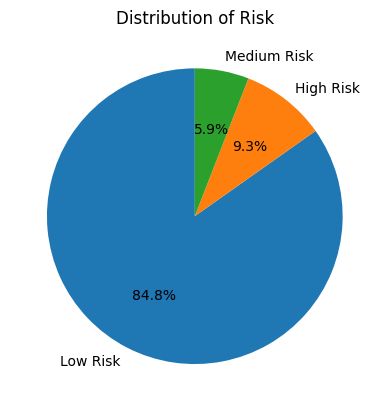

In [33]:
risk = graphic_data['Risk'].value_counts()
plt.pie(risk, labels=risk.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Risk')
plt.show()

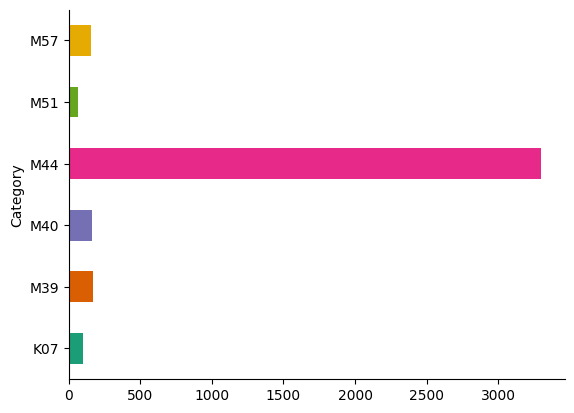

In [35]:
graphic_data.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Export

In [ ]:
# Export data
file_path = r'.xlsx'
sheet_name = ''
export_data = raw_data[['Item', 'Category','Penetration','Range','Risk']]

In [ ]:
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    # Check if the sheet already exists in the Excel file
    if sheet_name in writer.sheets:
        # Remove the existing sheet
        writer.book.remove(writer.sheets[sheet_name])

    # Write the DataFrame to the Excel file with the desired sheet name
    export_data.to_excel(writer, sheet_name=sheet_name, index=False)

print(f'DataFrame exported to Excel file: {file_path}')
print(f'DataFrame DATA exported to Excel file: {export_data}')